# Section 1: Dataset

I decided to do a project on NBA player statistics, because basketball is something that I have always loved. The reason why I fell in love with statistics is because of my love for sports, specifically basketball. I have been playing and watching basketball all my life and I really want to devote my life to basketball analytics once I graduate college. It is the main reason why I decided to major in Statistics at the University of Illinois. When I heard about this project, I was extremely excited and I instantly knew I wanted to do something that ahd to do with the NBA. After some reasearch, and with the help of GitHub user *Nathanlauga*, I was able to retrofit his code to use the NBA webesite's API to get the two datasets (games.csv and games_details.csv) that I will be working with. 

Here is the link the *Nathanlauga*'s GitHub repository: https://github.com/Nathanlauga/nba-data-scrapping/tree/master.

The first dataframe, **df1** contains the file **games.csv**. This dataset conatins the specific **team** stats for every single NBA game since the 2003/2004 NBA season. Below is a list of columns that the dataframe contains:

The first dataframe, **df2** contains the file **games_details.csv**. This dataset conatins the specific **player** stats for every single NBA game since the 2003/2004 NBA season. df1 and df2 are both connected by a key columns called *GAME_ID*. This column allows us to connect the players stat to the game that the stats were recorded in. Below is a list of columns that the dataframe contains:

I merged the two datasets under the name **merged**

This dataset was somewhat challenging to work with, and there are a few reasons for this. The first reason is that this dataset is not one dataset, it is in fact two datasets connected by a column ('GAME_ID'), as I mentioned before. The second reason why this dataset was challenging was that the two columns 'GAME_DATE_EST' and 'MIN' were both in odd formats, the ('GAME_DATE_EST' was in YYYY-MM-DD, and 'MIN' was in MM:SS). These are not real numbers so I had to get creative on how to deal with them, as seen below. The final reason why this dataset was so challenging was that the data was very messy, and extremely difficult to interpret -- so again, I had to get creative and create some subset dataframes. 

In [8]:
import pandas as pd

In [9]:
file_path = "C:/Users/qwitt/OneDrive/Desktop/nba-data-scrapping-master/data/games.csv"
df1 = pd.read_csv(file_path)
df1

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2023-12-05,22301201,Final,1610612749,1610612752,2023,1610612749,146.0,0.604,0.684,...,32.0,37.0,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1
1,2023-12-05,22301203,Final,1610612747,1610612756,2023,1610612747,106.0,0.373,0.840,...,24.0,45.0,1610612756,103.0,0.493,0.810,0.480,25.0,44.0,1
2,2023-12-04,22301202,Final,1610612754,1610612738,2023,1610612754,122.0,0.457,0.810,...,28.0,41.0,1610612738,112.0,0.474,0.667,0.293,27.0,56.0,1
3,2023-12-04,22301204,Final,1610612758,1610612740,2023,1610612758,117.0,0.447,0.818,...,29.0,38.0,1610612740,127.0,0.540,0.826,0.452,29.0,42.0,0
4,2023-12-02,22300280,Final,1610612746,1610612744,2023,1610612746,113.0,0.489,0.857,...,31.0,40.0,1610612744,112.0,0.442,0.792,0.395,31.0,42.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27847,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
27848,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
27849,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
27850,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [10]:
file_path2 = "C:/Users/qwitt/OneDrive/Desktop/nba-data-scrapping-master/data/games_details.csv"
df2 = pd.read_csv(file_path2)
df2

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22301201,1610612752,NYK,New York,1629628,RJ Barrett,RJ,F,NaN,31.000000:28,...,3.0,5.0,8.0,1.0,0.0,0.0,2.0,0.0,23.0,-6.0
1,22301201,1610612752,NYK,New York,203944,Julius Randle,Julius,F,NaN,36.000000:36,...,3.0,3.0,6.0,5.0,0.0,0.0,4.0,3.0,41.0,-21.0
2,22301201,1610612752,NYK,New York,1629011,Mitchell Robinson,Mitchell,C,NaN,27.000000:12,...,1.0,3.0,4.0,3.0,2.0,1.0,2.0,2.0,2.0,-10.0
3,22301201,1610612752,NYK,New York,1629656,Quentin Grimes,Quentin,G,NaN,18.000000:03,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,-3.0
4,22301201,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,NaN,34.000000:14,...,0.0,3.0,3.0,6.0,1.0,0.0,3.0,1.0,24.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361697,21100196,1610612744,GSW,Golden State,202327,Ekpe Udoh,NaN,NaN,NaN,17:39,...,1.0,3.0,4.0,0.0,0.0,2.0,1.0,3.0,2.0,-1.0
361698,21100196,1610612744,GSW,Golden State,201575,Brandon Rush,NaN,NaN,NaN,25:09,...,0.0,5.0,5.0,2.0,0.0,0.0,0.0,2.0,14.0,12.0
361699,21100196,1610612744,GSW,Golden State,202691,Klay Thompson,NaN,NaN,NaN,16:33,...,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,14.0,3.0
361700,21100196,1610612744,GSW,Golden State,201187,Dominic McGuire,NaN,NaN,NaN,19:19,...,2.0,2.0,4.0,3.0,0.0,2.0,0.0,3.0,3.0,4.0


In [11]:
df1["GAME_DATE_EST"] = pd.to_datetime(df1["GAME_DATE_EST"])

regular_season_dates = {
    "2023/24": ("2023-10-24", "2024-04-14"),
    "2022/23": ("2022-10-18", "2023-04-09"),
    "2021/22": ("2021-10-19", "2022-04-10"),
    "2020/21": ("2020-12-22", "2021-05-16"),
    "2019/20": ("2019-10-22", "2020-08-14"),
    "2018/19": ("2018-10-16", "2019-04-10"),
    "2017/18": ("2017-10-17", "2018-04-11"),
    "2016/17": ("2016-10-25", "2017-04-12"),
    "2015/16": ("2015-10-27", "2016-04-13"),
    "2014/15": ("2014-10-28", "2015-04-15"),
    "2013/14": ("2013-10-29", "2014-04-16"),
    "2012/13": ("2012-10-30", "2013-04-17"),
    "2011/12": ("2011-12-25", "2012-04-26"),
    "2010/11": ("2010-10-26", "2011-04-13"),
    "2009/10": ("2009-10-27", "2010-04-14"),
    "2008/09": ("2008-10-28", "2009-04-16"),
    "2007/08": ("2007-10-30", "2008-04-16"),
    "2006/07": ("2006-10-31", "2007-04-18"),
    "2005/06": ("2005-11-01", "2006-04-19"),
    "2004/05": ("2004-11-02", "2005-04-20"),
    "2003/04": ("2003-10-28", "2004-04-14")
}

for season, (start_date, end_date) in regular_season_dates.items():
    mask = (df1["GAME_DATE_EST"] >= start_date) & (df1["GAME_DATE_EST"] <= end_date)
    df1.loc[mask, "Season_real"] = season

df1 = df1.dropna(subset=["Season_real"])

In [12]:
merged = pd.merge(df2, df1, on="GAME_ID")
merged

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Season_real
0,22301201,1610612752,NYK,New York,1629628,RJ Barrett,RJ,F,NaN,31.000000:28,...,37.0,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24
1,22301201,1610612752,NYK,New York,203944,Julius Randle,Julius,F,NaN,36.000000:36,...,37.0,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24
2,22301201,1610612752,NYK,New York,1629011,Mitchell Robinson,Mitchell,C,NaN,27.000000:12,...,37.0,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24
3,22301201,1610612752,NYK,New York,1629656,Quentin Grimes,Quentin,G,NaN,18.000000:03,...,37.0,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24
4,22301201,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,NaN,34.000000:14,...,37.0,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362629,21100196,1610612744,GSW,Golden State,202327,Ekpe Udoh,NaN,NaN,NaN,17:39,...,54.0,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12
362630,21100196,1610612744,GSW,Golden State,201575,Brandon Rush,NaN,NaN,NaN,25:09,...,54.0,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12
362631,21100196,1610612744,GSW,Golden State,202691,Klay Thompson,NaN,NaN,NaN,16:33,...,54.0,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12
362632,21100196,1610612744,GSW,Golden State,201187,Dominic McGuire,NaN,NaN,NaN,19:19,...,54.0,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12


# Section 2: Exploratory Data Analysis (EDA)

In this section, I would like to analyze my favorite team, the Chicago Bulls--both as a team, and their individual players. To starts, I created a dataframe for all teams, just for this season. Then I used that dataframe to create a new dataframe that just contained the Bulls, stats for this season. As you can see from the first histogram (looking at only this season), it is not resemble a normal distribution in any way. But if we look at the second histogram (looking at the past five seasons), it begins to resemble a normal distribution. Finally, if we look at third histogram (looking the past twenty seasons), looks *approximately normal*. Since it looks *approximately normal*, we can perform EDA on it.

If you look at the third histogram, you can see that at some point in the last 20 years, the Bulls scored more than 160 points in one game. This is a very rare occurance, as this has only happened 27 times in NBA history. I would like to see what the probability of this happening within the last 20 years is. Firstly, I have to see how many points they scored that game. On March 1st, 2019 the Chicago Bulls beat the Atlanta Hawks 168 - 161 in a game that went to four overtimes. After finding the mean, standard deviation and z-score, I was able to figure out that the probability that the Bulls scored 168 points in a game in the last 20 seasons is 5.750051599556376e-08, or 0.00000575%. This is a very small number, and if I didn't know for a fact that this actually happened, I would assume that it is untrue.

In [13]:
grouped = merged.groupby(["Season_real", "PLAYER_ID", "PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION", "TEAM_CITY"])

In [14]:
import warnings
warnings.filterwarnings("ignore")

<Axes: ylabel='Frequency'>

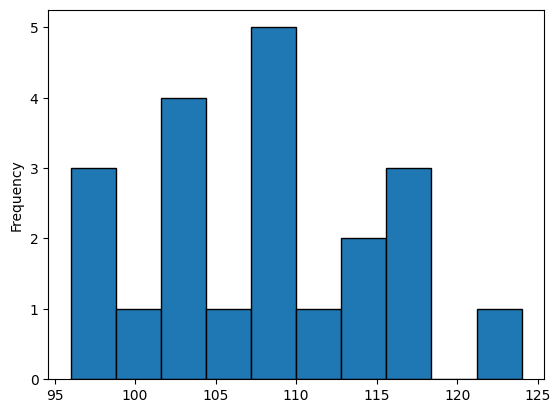

In [15]:
df_this_szn = df1[(df1["Season_real"] == "2023/24")]
df_this_szn_bulls = df_this_szn[(df_this_szn["HOME_TEAM_ID"] == 1610612741) | (df_this_szn["VISITOR_TEAM_ID"] == 1610612741)]

if (df_this_szn_bulls["HOME_TEAM_ID"] == 1610612741).any():
    df_this_szn_bulls["BullsPTS"] = df_this_szn_bulls["PTS_home"]
    df_this_szn_bulls["OppPTS"] = df_this_szn_bulls["PTS_away"]
    df_this_szn_bulls["BullsAST"] = df_this_szn_bulls["AST_home"]
    df_this_szn_bulls["OppAST"] = df_this_szn_bulls["AST_away"]
    df_this_szn_bulls["Bulls_Win?"] = (df_this_szn_bulls["HOME_TEAM_WINS"] == 1).astype(int)

if (df_this_szn_bulls["VISITOR_TEAM_ID"] == 1610612741).any():
    df_this_szn_bulls["OppPTS"] = df_this_szn_bulls["PTS_home"]
    df_this_szn_bulls["BullsPTS"] = df_this_szn_bulls["PTS_away"]
    df_this_szn_bulls["OppAST"] = df_this_szn_bulls["AST_home"]
    df_this_szn_bulls["BullsAST"] = df_this_szn_bulls["AST_away"]
    df_this_szn_bulls["Bulls_Win?"] = (df_this_szn_bulls["HOME_TEAM_WINS"] == 0).astype(int)

df_this_szn_bulls = df_this_szn_bulls[["GAME_DATE_EST", "GAME_ID", "BullsPTS", "OppPTS", "BullsAST", "OppAST", "Season_real", "Bulls_Win?"]]
df_this_szn_bulls["BullsPTS"].plot.hist(bins=10, edgecolor="black")

<Axes: ylabel='Frequency'>

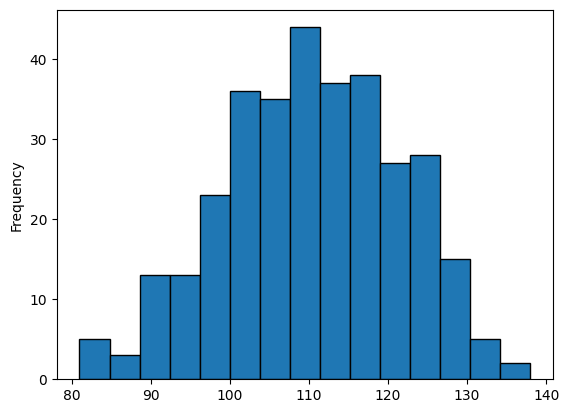

In [16]:
df_last_five_szn = df1[(df1["Season_real"] == "2023/24")| (df1["Season_real"] == "2022/23") | (df1["Season_real"] == "2021/22") | (df1["Season_real"] == "2020/21") | (df1["Season_real"] == "2019/20")]
df_last_five_szn_bulls = df_last_five_szn[(df_last_five_szn["HOME_TEAM_ID"] == 1610612741) | (df_last_five_szn["VISITOR_TEAM_ID"] == 1610612741)]

if (df_last_five_szn_bulls["HOME_TEAM_ID"] == 1610612741).any():
    df_last_five_szn_bulls["BullsPTS"] = df_last_five_szn_bulls["PTS_home"]
    df_last_five_szn_bulls["OppPTS"] = df_last_five_szn_bulls["PTS_away"]
    df_last_five_szn_bulls["BullsAST"] = df_last_five_szn_bulls["AST_home"]
    df_last_five_szn_bulls["OppAST"] = df_last_five_szn_bulls["AST_away"]
    df_last_five_szn_bulls["Bulls_Win?"] = (df_last_five_szn_bulls["HOME_TEAM_WINS"] == 1).astype(int)

if (df_last_five_szn_bulls["VISITOR_TEAM_ID"] == 1610612741).any():
    df_last_five_szn_bulls["OppPTS"] = df_last_five_szn_bulls["PTS_home"]
    df_last_five_szn_bulls["BullsPTS"] = df_last_five_szn_bulls["PTS_away"]
    df_last_five_szn_bulls["OppAST"] = df_last_five_szn_bulls["AST_home"]
    df_last_five_szn_bulls["BullsAST"] = df_last_five_szn_bulls["AST_away"]
    df_last_five_szn_bulls["Bulls_Win?"] = (df_last_five_szn_bulls["HOME_TEAM_WINS"] == 0).astype(int)

df_last_five_szn_bulls = df_last_five_szn_bulls[["GAME_DATE_EST", "GAME_ID", "BullsPTS", "OppPTS", "BullsAST", "OppAST", "Season_real", "Bulls_Win?"]]
df_last_five_szn_bulls["BullsPTS"].plot.hist(bins=15, edgecolor="black")

<Axes: ylabel='Frequency'>

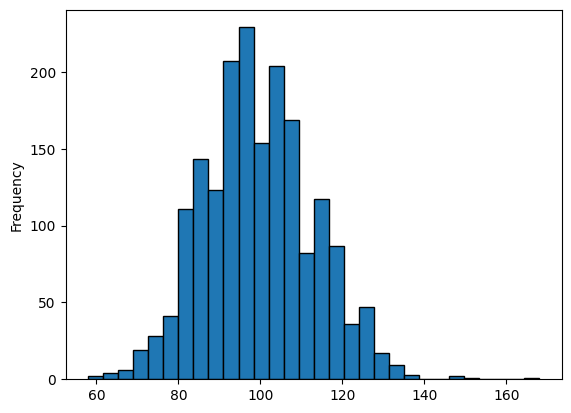

In [17]:
df_last_20 = df1
df_last_20_szn_bulls = df_last_20[(df_last_20["HOME_TEAM_ID"] == 1610612741) | (df_last_20["VISITOR_TEAM_ID"] == 1610612741)]

if (df_last_20_szn_bulls["HOME_TEAM_ID"] == 1610612741).any():
    df_last_20_szn_bulls["BullsPTS"] = df_last_20_szn_bulls["PTS_home"]
    df_last_20_szn_bulls["OppPTS"] = df_last_20_szn_bulls["PTS_away"]
    df_last_20_szn_bulls["BullsAST"] = df_last_20_szn_bulls["AST_home"]
    df_last_20_szn_bulls["OppAST"] = df_last_20_szn_bulls["AST_away"]
    df_last_20_szn_bulls["Bulls_Win?"] = (df_last_20_szn_bulls["HOME_TEAM_WINS"] == 1).astype(int)

if (df_last_20_szn_bulls["VISITOR_TEAM_ID"] == 1610612741).any():
    df_last_20_szn_bulls["OppPTS"] = df_last_20_szn_bulls["PTS_home"]
    df_last_20_szn_bulls["BullsPTS"] = df_last_20_szn_bulls["PTS_away"]
    df_last_20_szn_bulls["OppAST"] = df_last_20_szn_bulls["AST_home"]
    df_last_20_szn_bulls["BullsAST"] = df_last_20_szn_bulls["AST_away"]
    df_last_20_szn_bulls["Bulls_Win?"] = (df_last_20_szn_bulls["HOME_TEAM_WINS"] == 0).astype(int)

df_last_20_szn_bulls = df_last_20_szn_bulls[["GAME_DATE_EST", "GAME_ID", "BullsPTS", "OppPTS", "BullsAST", "OppAST", "Season_real", "Bulls_Win?"]]
df_last_20_szn_bulls["BullsPTS"].plot.hist(bins=30, edgecolor="black")

In [18]:
df_last_20_szn_bulls[df_last_20_szn_bulls["BullsPTS"] > 160]

,GAME_DATE_EST,GAME_ID,BullsPTS,OppPTS,BullsAST,OppAST,Season_real,Bulls_Win?
21231,2019-03-01,21800928,168.0,161.0,30.0,33.0,2018/19,1


In [19]:
from scipy.stats import norm

bulls_pts = df_last_20_szn_bulls["BullsPTS"]

mean_bulls_pts = bulls_pts.mean()
std_bulls_pts = bulls_pts.std()

target_score = 168

z_score = (target_score - mean_bulls_pts) / std_bulls_pts

probability = norm.pdf(target_score, loc=mean_bulls_pts, scale=std_bulls_pts)

probability

5.750051599556376e-08

# Section 4: Data Science
**Note: Section 4 comes before Section 3 in my project because Section 3 involves doing a residual of the data that I found in Section 4, therefore Section 4 needs to come first.**

Section 4 is probably my favorite part of this project, and is what I had set out to do from the very beginning. I wanted to create an algorithm that would predict a player's statistics based off of past performances. There are so many variables that I had to take into account in order to perfect this (there were also many more subsequent datasets that I had to create in order to create these main datasets; but other than that they are relatively unimportant). I also wanted to account for if the player was on a hot/cold streak leading up to the game, so I created five different dataframes to account for this, **stats_last_five, stats_last_four, stats_last_three, stats_last_two, stats_last_game**, which contains the stats for the player's last one, two, three, four and five games. Sometimes players are more confident coming off of a win, so I created **stats_after_win**, which contains the player's stats the game after a win. I also wanted to account for how this player has done against the specific team they are playing against in the past, so I haver **per_game_against** to account for that. I wanted to be able to account for injuries, so I created **proj_stat**, which creates a column called shot% and determine the percent of shots taken by the player after dropping the injured players from the dataset and adjust the players stats accordingly. Another dataset I created was **stats_model**, which used Linear Regression and machine learning to predict the player's stats based off of stats from this season (2023/24). The final dataset that I created was **similar_mean_stats**. This dataset was created to account for how this player has done against teams with similar defensive ratings this season (I used +/- 2.5 Points Allowed Per Game than the team the player is playing against in order to determin whcih teams were eligable.)

All you have to do is enter the name of the player you want to predict, the team they are playing against, if the player's team is home or away and any key inactive players on the players team, all into Cell 20, then run all the following cells.

In [20]:
notna_min = grouped["MIN"].transform(lambda x: x.notna())

total_points = grouped["PTS"].sum()
total_games = grouped["MIN"].count()
total_rebounds = grouped["REB"].sum()
defensive_rebounds = grouped["DREB"].sum()
offensive_rebounds = grouped["OREB"].sum()
assists = grouped["AST"].sum()
steals = grouped["STL"].sum()
blocks = grouped["BLK"].sum()
field_goals_made = grouped["FGM"].sum()
pointers_made = grouped["FG3M"].sum()
free_throws_made = grouped["FTM"].sum()
box_plus_minus = grouped["PLUS_MINUS"].sum()
field_goals_attempted = grouped["FGA"].sum()
pointers_attempted = grouped["FG3A"].sum()
free_throws_attempted = grouped["FTA"].sum()
minutes_played = grouped["MIN"].sum()
season = grouped["Season_real"]
player_name = grouped["PLAYER_NAME"].max()
player_id = grouped["PLAYER_ID"].max()

player_stats_df = pd.DataFrame({
    "PLAYER_NAME": player_name,
    "TotalPoints": total_points,
    "TotalGames": total_games,
    "TotalRebounds": total_rebounds,
    "DefensiveRebounds": defensive_rebounds,
    "OffensiveRebounds": offensive_rebounds,
    "Assists": assists,
    "Steals": steals,
    "Blocks": blocks,
    "FieldGoalsMade": field_goals_made,
    "twoPointersMade": pointers_made,
    "FreeThrowsMade": free_throws_made,
    "BoxPlusMinus": box_plus_minus,
    "FGA": field_goals_attempted,
    "3PA": pointers_attempted,
    "FTA": free_throws_attempted,
    "MIN": minutes_played,
    "year_season": season,
    "PLAYER_ID": player_id
})

player_stats_df["FG%"] = (player_stats_df["FieldGoalsMade"] / player_stats_df["FGA"])
player_stats_df["3P%"] = (player_stats_df["twoPointersMade"] / player_stats_df["3PA"])
player_stats_df["FT%"] = (player_stats_df["FreeThrowsMade"] / player_stats_df["FTA"])
per_game_stats_df = player_stats_df.copy()
per_game_stats_df["PPG"] = per_game_stats_df["TotalPoints"] / per_game_stats_df["TotalGames"]
per_game_stats_df["RPG"] = per_game_stats_df["TotalRebounds"] / per_game_stats_df["TotalGames"]
per_game_stats_df["OREB"] = per_game_stats_df["OffensiveRebounds"] / per_game_stats_df["TotalGames"]
per_game_stats_df["DREB"] = per_game_stats_df["DefensiveRebounds"] / per_game_stats_df["TotalGames"]
per_game_stats_df["APG"] = per_game_stats_df["Assists"] / per_game_stats_df["TotalGames"]
per_game_stats_df["STL"] = per_game_stats_df["Steals"] / per_game_stats_df["TotalGames"]
per_game_stats_df["BLK"] = per_game_stats_df["Blocks"] / per_game_stats_df["TotalGames"]
per_game_stats_df["FGA"] = per_game_stats_df["FGA"] / per_game_stats_df["TotalGames"]
per_game_stats_df["FGM"] = per_game_stats_df["FieldGoalsMade"] / per_game_stats_df["TotalGames"]
per_game_stats_df["3PA"] = per_game_stats_df["3PA"] / per_game_stats_df["TotalGames"]
per_game_stats_df["3PM"] = per_game_stats_df["twoPointersMade"] / per_game_stats_df["TotalGames"]
per_game_stats_df["FTA"] = per_game_stats_df["FTA"] / per_game_stats_df["TotalGames"]
per_game_stats_df["FTM"] = per_game_stats_df["FreeThrowsMade"] / per_game_stats_df["TotalGames"]

per_game_stats_df = per_game_stats_df.sort_values(by="year_season")
per_game_stats_df.reset_index(inplace=True, drop=True)

In [21]:
team_stats = df1.groupby(["HOME_TEAM_ID", "TEAM_ID_away", "Season_real"]).agg({"PTS_home": "mean", "PTS_away": "mean", "FG_PCT_home": "mean", "FT_PCT_home": "mean", "FG3_PCT_home": "mean", "AST_home": "mean", "REB_home": "mean"}).reset_index()

team_stats.columns = ["HOME_TEAM_ID", "TEAM_ID_away", "Season_real", "Avg_PTS_Scored", "Avg_PTS_Allowed", "Avg_FG_PCT", "Avg_FT_PCT", "Avg_FG3_PCT", "Avg_AST", "Avg_REB"]

In [22]:
team_id_to_name = {
    1610612737: "Atlanta Hawks",
    1610612738: "Boston Celtics",
    1610612740: "New Orleans Pelicans",
    1610612741: "Chicago Bulls",
    1610612742: "Dallas Mavericks",
    1610612743: "Denver Nuggets",
    1610612745: "Houston Rockets",
    1610612746: "Los Angeles Clippers",
    1610612747: "Los Angeles Lakers",
    1610612748: "Miami Heat",
    1610612749: "Milwaukee Bucks",
    1610612750: "Minnesota Timberwolves",
    1610612751: "Brooklyn Nets",
    1610612752: "New York Knicks",
    1610612753: "Orlando Magic",
    1610612754: "Indiana Pacers",
    1610612755: "Philadelphia 76ers",
    1610612756: "Phoenix Suns",
    1610612757: "Portland Trail Blazers",
    1610612758: "Sacramento Kings",
    1610612759: "San Antonio Spurs",
    1610612760: "Oklahoma City Thunder",
    1610612761: "Toronto Raptors",
    1610612762: "Utah Jazz",
    1610612763: "Memphis Grizzlies",
    1610612764: "Washington Wizards",
    1610612765: "Detroit Pistons",
    1610612766: "Charlotte Hornets",
    1610612739: "Cleveland Cavaliers",
    1610612744: "Golden State Warriors",
}

team_stats["TEAM_NAME_home"] = team_stats["HOME_TEAM_ID"].map(team_id_to_name)
team_stats["TEAM_NAME_away"] = team_stats["TEAM_ID_away"].map(team_id_to_name)

In [23]:
team_stats_columns = ["GAME_DATE_EST", "GAME_ID", "GAME_STATUS_TEXT", "TEAM_ID_home", "PTS_home", "FT_PCT_home", "FG3_PCT_home", "FG_PCT_home", "AST_home", "REB_home", "TEAM_ID_away", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away", "HOME_TEAM_WINS", "Season_real"]

team_stats_df = df1[team_stats_columns].copy()

data = []

for team_id in team_stats_df["TEAM_ID_home"].unique():
    for season in team_stats_df["Season_real"].unique():
        home_data = team_stats_df[(team_stats_df["TEAM_ID_home"] == team_id) & (team_stats_df["Season_real"] == season)]
        away_data = team_stats_df[(team_stats_df["TEAM_ID_away"] == team_id) & (team_stats_df["Season_real"] == season)]
        team_season_data = pd.concat([home_data, away_data])
        ppg = team_season_data["PTS_home"].mean()
        papg = team_season_data["PTS_away"].mean()
        fg_pct = team_season_data["FG_PCT_home"].mean()
        fg_pct_away = team_season_data["FG_PCT_away"].mean()
        reb = team_season_data["REB_home"].mean()
        reb_away = team_season_data["REB_away"].mean()
        ast = team_season_data["AST_home"].mean()
        ast_away = team_season_data["AST_away"].mean()
        three_pct = team_season_data["FG3_PCT_home"].mean()
        three_pct_away = team_season_data["FG3_PCT_away"].mean()
        ft_pct = team_season_data["FT_PCT_home"].mean()
        ft_pct_away = team_season_data["FT_PCT_away"].mean()
        games_played = team_season_data["GAME_ID"].nunique()
        
        d = {
            "TEAM_ID_home": team_id,
            "Season_real": season,
            "PPG": ppg,
            "PAPG": papg,
            "FG%": fg_pct,
            "FG%A": fg_pct_away,
            "REB": reb,
            "REBA": reb_away,
            "AST": ast,
            "ASTA": ast_away,
            "3P%": three_pct,
            "3P%A": three_pct_away,
            "FT%": ft_pct,
            "FT%A": ft_pct_away,
            "Games_Played": games_played
        }
        data.append(d)

team_stats_combined = pd.DataFrame(data)

team_stats_combined["TEAM_NAME"] = team_stats_combined["TEAM_ID_home"].map(team_id_to_name)

team_stats_combined["Score_Difference"] = team_stats_combined["PPG"] - team_stats_combined["PAPG"]

In [24]:
team_stats_columns = ["GAME_DATE_EST", "GAME_ID", "GAME_STATUS_TEXT", "TEAM_ID_home", "PTS_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home", "TEAM_ID_away", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away", "HOME_TEAM_WINS", "Season_real"]
team_stats_df = df1[team_stats_columns].copy()

In [25]:
team_stats["HOME_GAME"] = team_stats["HOME_TEAM_ID"] == team_stats["HOME_TEAM_ID"]
team_stats[team_stats["HOME_GAME"] == True]

,HOME_TEAM_ID,TEAM_ID_away,Season_real,Avg_PTS_Scored,Avg_PTS_Allowed,Avg_FG_PCT,Avg_FT_PCT,Avg_FG3_PCT,Avg_AST,Avg_REB,TEAM_NAME_home,TEAM_NAME_away,HOME_GAME
0,1610612737,1610612738,2003/04,101.5,93.500000,0.4805,0.836000,0.3745,23.500000,45.000000,Atlanta Hawks,Boston Celtics,True
1,1610612737,1610612738,2004/05,100.0,106.000000,0.4205,0.721500,0.3000,18.500000,46.000000,Atlanta Hawks,Boston Celtics,True
2,1610612737,1610612738,2005/06,107.0,107.500000,0.5030,0.852500,0.5675,23.000000,37.500000,Atlanta Hawks,Boston Celtics,True
3,1610612737,1610612738,2006/07,102.0,96.000000,0.5485,0.776000,0.3865,22.000000,39.000000,Atlanta Hawks,Boston Celtics,True
4,1610612737,1610612738,2007/08,89.0,99.000000,0.4320,0.625000,0.2220,24.000000,41.000000,Atlanta Hawks,Boston Celtics,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17947,1610612766,1610612765,2020/21,106.0,98.000000,0.4415,0.704000,0.3555,25.000000,49.500000,Charlotte Hornets,Detroit Pistons,True
17948,1610612766,1610612765,2021/22,133.0,119.000000,0.5495,0.683000,0.4950,32.000000,47.500000,Charlotte Hornets,Detroit Pistons,True
17949,1610612766,1610612765,2022/23,125.5,123.500000,0.4650,0.805500,0.4165,22.500000,49.000000,Charlotte Hornets,Detroit Pistons,True
17950,1610612766,1610612765,2023/24,99.0,111.000000,0.3750,0.765000,0.2500,20.000000,41.000000,Charlotte Hornets,Detroit Pistons,True


In [26]:
columns = ["TEAM_ID_home",'Season_real','PPG','PAPG','FG%','FG%A','REB','REBA','AST','ASTA','3P%','3P%A','FT%','FT%A','Games_Played','TEAM_NAME',"Score_Difference"]

new_team = team_stats_combined[columns].copy()

new_team.rename(columns={'TEAM_ID_home': 'TEAM_ID'}, inplace=True)

In [60]:
player_name = "Donovan Mitchell"
team_against = "Orlando Magic"
home_away = "home"
notable_inactive_1 = "Caris LeVert"
notable_inactive_2 = "Ricky Rubio"

In [61]:
player_df = player_stats_df[player_stats_df["PLAYER_NAME"] == player_name]

In [62]:
if not player_df.empty:
    id_player = player_df["PLAYER_ID"].iloc[0]

inactive_1_df = df2[df2["PLAYER_NAME"] == notable_inactive_1]

if not inactive_1_df.empty:
    id_player_inactive_1 = inactive_1_df["PLAYER_ID"].iloc[0]

if notable_inactive_2 is not None:
    inactive_2_df = df2[df2["PLAYER_NAME"] == notable_inactive_2]

    if not inactive_2_df.empty:
        id_player_inactive_2 = inactive_2_df["PLAYER_ID"].iloc[0]
    else:
        id_player_inactive_2 = None
else:
    id_player_inactive_2 = None

In [63]:
player = df2[df2["PLAYER_NAME"] == player_name]
player["FG%"] = player["FGM"]/player["FGA"]

def convert_time(time_str):
    if isinstance(time_str, str) and ":" in time_str:
        minutes, seconds = map(float, time_str.split(":"))
        return minutes + seconds / 60
    else:
        return float(time_str) / 60

player["MIN_converted"] = player["MIN"].apply(convert_time)

In [64]:
def get_players_team(season):
    try:
        season_data = merged[merged["Season_real"] == season]
        players_team = season_data[season_data["PLAYER_NAME"] == player_name]["TEAM_ID"].iloc[0]
        return players_team
    except IndexError:
        return None
    
players_team_2324 = get_players_team("2023/24")
players_team_2223 = get_players_team("2022/23")
players_team_2122 = get_players_team("2021/22")
players_team_2021 = get_players_team("2020/21")
players_team_1920 = get_players_team("2019/20")
players_team_1819 = get_players_team("2018/19")
players_team_1718 = get_players_team("2017/18")
players_team_1617 = get_players_team("2016/17")
players_team_1516 = get_players_team("2015/16")
players_team_1415 = get_players_team("2014/15")
players_team_1314 = get_players_team("2013/14")
players_team_1213 = get_players_team("2012/13")
players_team_1112 = get_players_team("2011/12")
players_team_1011 = get_players_team("2010/11")
players_team_0910 = get_players_team("2009/10")
players_team_0809 = get_players_team("2008/09")
players_team_0708 = get_players_team("2007/08")
players_team_0607 = get_players_team("2006/07")
players_team_0506 = get_players_team("2005/06")
players_team_0405 = get_players_team("2004/05")
players_team_0304 = get_players_team("2003/04")

In [65]:
team_stats_2324 = team_stats_df[team_stats_df["Season_real"] == "2023/24"]
team_stats_2223 = team_stats_df[team_stats_df["Season_real"] == "2022/23"]
team_stats_2122 = team_stats_df[team_stats_df["Season_real"] == "2021/22"]
team_stats_2021 = team_stats_df[team_stats_df["Season_real"] == "2020/21"]
team_stats_1920 = team_stats_df[team_stats_df["Season_real"] == "2019/20"]
team_stats_1819 = team_stats_df[team_stats_df["Season_real"] == "2018/19"]
team_stats_1718 = team_stats_df[team_stats_df["Season_real"] == "2017/18"]
team_stats_1617 = team_stats_df[team_stats_df["Season_real"] == "2016/17"]
team_stats_1516 = team_stats_df[team_stats_df["Season_real"] == "2015/16"]
team_stats_1415 = team_stats_df[team_stats_df["Season_real"] == "2014/15"]
team_stats_1314 = team_stats_df[team_stats_df["Season_real"] == "2013/14"]
team_stats_1213 = team_stats_df[team_stats_df["Season_real"] == "2012/13"]
team_stats_1112 = team_stats_df[team_stats_df["Season_real"] == "2011/12"]
team_stats_1011 = team_stats_df[team_stats_df["Season_real"] == "2010/11"]
team_stats_0910 = team_stats_df[team_stats_df["Season_real"] == "2009/10"]
team_stats_0809 = team_stats_df[team_stats_df["Season_real"] == "2008/09"]
team_stats_0708 = team_stats_df[team_stats_df["Season_real"] == "2007/08"]
team_stats_0607 = team_stats_df[team_stats_df["Season_real"] == "2006/07"]
team_stats_0506 = team_stats_df[team_stats_df["Season_real"] == "2005/06"]
team_stats_0405 = team_stats_df[team_stats_df["Season_real"] == "2004/05"]
team_stats_0304 = team_stats_df[team_stats_df["Season_real"] == "2003/04"]

In [66]:
last_game = player.head(1)
stats_last_game = (((last_game["FGM"].sum() - last_game["FG3M"].sum())*2 + (last_game["FG3M"].sum() *3) + (last_game["FTM"].sum())) / (last_game["MIN_converted"].sum())), (last_game["AST"].sum() / last_game["MIN_converted"].sum()), (last_game["REB"].sum() / last_game["MIN_converted"].sum()), (last_game["BLK"].sum() / last_game["MIN_converted"].sum()), (last_game["STL"].sum() / last_game["MIN_converted"].sum()), (last_game["TO"].sum() / last_game["MIN_converted"].sum()), last_game["MIN_converted"].mean()
stats_last_game

(0.60790273556231,
 0.12158054711246201,
 0.0911854103343465,
 0.0,
 0.060790273556231005,
 0.12158054711246201,
 32.9)

In [67]:
last_two_games = player.head(2)
stats_last_two = (((last_two_games["FGM"].sum() - last_two_games["FG3M"].sum())*2 + (last_two_games["FG3M"].sum() *3) + (last_two_games["FTM"].sum())) / (last_two_games["MIN_converted"].sum())), (last_two_games["AST"].sum() / last_two_games["MIN_converted"].sum()), (last_two_games["REB"].sum() / last_two_games["MIN_converted"].sum()), (last_two_games["BLK"].sum() / last_two_games["MIN_converted"].sum()), (last_two_games["STL"].sum() / last_two_games["MIN_converted"].sum()), (last_two_games["TO"].sum() / last_two_games["MIN_converted"].sum()), last_two_games["MIN_converted"].mean()
stats_last_two

(0.6475903614457831,
 0.1506024096385542,
 0.1506024096385542,
 0.0,
 0.09036144578313252,
 0.0753012048192771,
 33.2)

In [68]:
last_three_games = player.head(3)
stats_last_three = (((last_three_games["FGM"].sum() - last_three_games["FG3M"].sum())*2 + (last_three_games["FG3M"].sum() *3) + (last_three_games["FTM"].sum())) / (last_three_games["MIN_converted"].sum())), (last_three_games["AST"].sum() / last_three_games["MIN_converted"].sum()), (last_three_games["REB"].sum() / last_three_games["MIN_converted"].sum()), (last_three_games["BLK"].sum() / last_three_games["MIN_converted"].sum()), (last_three_games["STL"].sum() / last_three_games["MIN_converted"].sum()), (last_three_games["TO"].sum() / last_three_games["MIN_converted"].sum()), last_three_games["MIN_converted"].mean()
stats_last_three

(0.8182714426552744,
 0.14788038120276042,
 0.2070325336838646,
 0.009858692080184028,
 0.08872822872165625,
 0.10844561288202431,
 33.81111111111111)

In [69]:
last_four_games = player.head(4)
stats_last_four = (((last_four_games["FGM"].sum() - last_four_games["FG3M"].sum())*2 + (last_four_games["FG3M"].sum() *3) + (last_four_games["FTM"].sum())) / (last_four_games["MIN_converted"].sum())), (last_four_games["AST"].sum() / last_four_games["MIN_converted"].sum()), (last_four_games["REB"].sum() / last_four_games["MIN_converted"].sum()), (last_four_games["BLK"].sum() / last_four_games["MIN_converted"].sum()), (last_four_games["STL"].sum() / last_four_games["MIN_converted"].sum()), (last_four_games["TO"].sum() / last_four_games["MIN_converted"].sum()), last_four_games["MIN_converted"].mean()
stats_last_four

(0.6877850363613953,
 0.1405152224824356,
 0.19228398866017501,
 0.007395538025391347,
 0.07395538025391347,
 0.08135091827930482,
 33.80416666666667)

In [70]:
last_five_games = player.head(5)
stats_last_five = (((last_five_games["FGM"].sum() - last_five_games["FG3M"].sum())*2 + (last_five_games["FG3M"].sum() *3) + (last_five_games["FTM"].sum())) / (last_five_games["MIN_converted"].sum())), (last_five_games["AST"].sum() / last_five_games["MIN_converted"].sum()), (last_five_games["REB"].sum() / last_five_games["MIN_converted"].sum()), (last_five_games["BLK"].sum() / last_five_games["MIN_converted"].sum()), (last_five_games["STL"].sum() / last_five_games["MIN_converted"].sum()), (last_five_games["TO"].sum() / last_five_games["MIN_converted"].sum()), last_five_games["MIN_converted"].mean()
stats_last_five

(0.6756756756756758,
 0.14688601645123386,
 0.18213866039952997,
 0.005875440658049354,
 0.0646298472385429,
 0.07050528789659224,
 34.04)

In [71]:
merged["MIN_converted"] = merged["MIN"].apply(convert_time)
merged

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Season_real,MIN_converted
0,22301201,1610612752,NYK,New York,1629628,RJ Barrett,RJ,F,NaN,31.000000:28,...,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24,31.466667
1,22301201,1610612752,NYK,New York,203944,Julius Randle,Julius,F,NaN,36.000000:36,...,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24,36.600000
2,22301201,1610612752,NYK,New York,1629011,Mitchell Robinson,Mitchell,C,NaN,27.000000:12,...,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24,27.200000
3,22301201,1610612752,NYK,New York,1629656,Quentin Grimes,Quentin,G,NaN,18.000000:03,...,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24,18.050000
4,22301201,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,NaN,34.000000:14,...,1610612752,122.0,0.494,0.879,0.304,27.0,36.0,1,2023/24,34.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362629,21100196,1610612744,GSW,Golden State,202327,Ekpe Udoh,NaN,NaN,NaN,17:39,...,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12,17.650000
362630,21100196,1610612744,GSW,Golden State,201575,Brandon Rush,NaN,NaN,NaN,25:09,...,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12,25.150000
362631,21100196,1610612744,GSW,Golden State,202691,Klay Thompson,NaN,NaN,NaN,16:33,...,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12,16.550000
362632,21100196,1610612744,GSW,Golden State,201187,Dominic McGuire,NaN,NaN,NaN,19:19,...,1610612744,105.0,0.436,0.737,0.474,26.0,43.0,0,2011/12,19.316667


In [72]:
player_szn = merged[(merged["PLAYER_NAME"] == player_name) & (merged["Season_real"] == "2023/24")]
stats_current_szn = (last_five_games["FGM"].sum()) #still more to do...

In [73]:
game_ids_after_win = []

seasons = ["2003/04", "2004/05", "2005/06", "2006/07", "2007/08", "2009/10", "2010/11", "2011/12", "2012/13", "2013/14", "2014/15", "2015/16", "2016/17", "2017/18", "2018/19", "2019/20", "2020/21", "2021/22", "2022/23", "2023/24"]

for season in seasons:
    filtered_df = merged[(merged["Season_real"] == season) & (merged["PLAYER_NAME"] == player_name)]
    
    if not filtered_df.empty:
        players_team_season = filtered_df["TEAM_ID"].iloc[0]
        
        team_stats_season = team_stats_df[team_stats_df["Season_real"] == season]
        player_team_stats_season = team_stats_season[(team_stats_season["TEAM_ID_home"] == players_team_season) | (team_stats_season["TEAM_ID_away"] == players_team_season)].reset_index(drop=True)
        player_home_win = player_team_stats_season[(player_team_stats_season["TEAM_ID_home"] == players_team_season) & (player_team_stats_season["HOME_TEAM_WINS"] == 1)]
        player_away_win = player_team_stats_season[(player_team_stats_season["TEAM_ID_away"] == players_team_season) & (player_team_stats_season["HOME_TEAM_WINS"] == 0)]
        home_win_index = player_home_win.index
        away_win_index = player_away_win.index
        game_after_home_win_index = home_win_index - 1
        game_after_home_win_index = game_after_home_win_index[game_after_home_win_index >= 0]
        game_after_away_win_index = away_win_index - 1
        game_after_away_win_index = game_after_away_win_index[game_after_away_win_index >= 0]
        game_after_win_season = pd.concat([player_team_stats_season.loc[game_after_home_win_index], player_team_stats_season.loc[game_after_away_win_index]])
        game_ids_after_win.extend(game_after_win_season["GAME_ID"].tolist())
    else:
        print(f"N/a")

game_ids_after_win


N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a
N/a


[21901274,
 11900125,
 21900902,
 21900832,
 21900790,
 21900698,
 21900665,
 21900651,
 21900585,
 21900574,
 21900511,
 21900485,
 21900416,
 21900405,
 21900350,
 21900248,
 21900234,
 21900170,
 21900144,
 21900124,
 21900075,
 21900049,
 21900025,
 21901240,
 21901231,
 21900959,
 21900941,
 21900933,
 21900921,
 21900816,
 21900798,
 21900680,
 21900616,
 21900599,
 21900561,
 21900544,
 21900525,
 21900495,
 21900449,
 21900430,
 21900379,
 21900291,
 21900223,
 21900152,
 21900063,
 22001030,
 22001016,
 22001008,
 22000996,
 22000981,
 22000855,
 22000844,
 22000820,
 22000801,
 22000764,
 22000752,
 22000725,
 22000715,
 22000700,
 22000691,
 22000656,
 22000594,
 22000507,
 22000497,
 22000444,
 22000423,
 22000410,
 22000402,
 22000338,
 22000306,
 22000297,
 22000282,
 22000270,
 22000242,
 22000227,
 22000200,
 22000089,
 22001077,
 22000955,
 22000909,
 22000887,
 22000743,
 22000676,
 22000068,
 22000028,
 22000020,
 22000166,
 22000533,
 22000457,
 22000379,
 22000363,

In [77]:
player_stats_after_wins = merged[(merged["PLAYER_NAME"] == player_name) & (merged["GAME_ID"].isin(game_ids_after_win))]

player_stats_after_wins["MIN_converted"] = player_stats_after_wins["MIN"].apply(convert_time)
player_stats_after_wins

per_game_after_win = player_stats_after_wins.groupby("Season_real", as_index=False).agg(lambda x: x.mean() if x.dtype.kind in "biufc" else x.iloc[0])
per_game_after_win.columns = [col if col != "Season_real" else "per_game_after_win" for col in per_game_after_win.columns]
per_game_after_win = per_game_after_win[["per_game_after_win","FGM", "FGA", "FG3M", "FG3A", "FTM", "FTA", "AST", "REB", "STL", "BLK", "TO", "MIN_converted"]]
per_game_after_win.rename(columns={"per_game_after_win": "season", "MIN_converted" : "MIN"}, inplace=True)
per_game_after_win["games_played"] = player_stats_after_wins.groupby("Season_real")["GAME_ID"].count().values
per_game_after_win

,season,FGM,FGA,FG3M,FG3A,FTM,FTA,AST,REB,STL,BLK,TO,MIN,games_played
0,2019/20,8.258065,17.870968,2.516129,6.870968,3.193548,3.516129,4.516129,3.870968,1.129032,0.193548,2.806452,33.629032,31
1,2020/21,8.750000,20.200000,3.425000,8.600000,5.025000,5.825000,5.275000,4.225000,1.075000,0.375000,2.725000,32.846667,40
2,2021/22,9.219512,20.926829,3.536585,10.000000,4.439024,5.024390,5.414634,4.268293,1.487805,0.195122,3.170732,34.083333,41
3,2022/23,10.428571,21.714286,4.000000,10.190476,4.976190,5.833333,4.571429,4.428571,1.285714,0.428571,2.571429,37.333333,44
4,2023/24,10.666667,22.833333,2.833333,9.333333,6.833333,7.500000,5.833333,6.333333,2.333333,0.666667,2.833333,37.125000,6


In [78]:
stats_after_win = (((per_game_after_win["FGM"].sum() - per_game_after_win["FG3M"].sum())*2 + (per_game_after_win["FG3M"].sum() *3) + (per_game_after_win["FTM"].sum())) / (per_game_after_win["MIN"].sum())), (per_game_after_win["AST"].sum() / per_game_after_win["MIN"].sum()), (per_game_after_win["REB"].sum() / per_game_after_win["MIN"].sum()), (per_game_after_win["BLK"].sum() / per_game_after_win["MIN"].sum()), (per_game_after_win["STL"].sum() / per_game_after_win["MIN"].sum()), (per_game_after_win["TO"].sum() / per_game_after_win["MIN"].sum()), per_game_after_win["MIN"].mean()
stats_after_win

(0.7737733537108149,
 0.14633133687518032,
 0.13213640319988754,
 0.010621279935696549,
 0.04177233916449859,
 0.08060311716676624,
 35.00347311827957)

In [79]:
team_against_id_list = team_stats.loc[team_stats["TEAM_NAME_home"] == team_against, "HOME_TEAM_ID"]

if not team_against_id_list.empty:
    team_against_id = team_against_id_list.iloc[0]

    if home_away == "away":
        stats_against_team = merged[((merged["HOME_TEAM_ID"] == team_against_id)) & (merged["PLAYER_NAME"] == player_name)]
    else:
        stats_against_team = merged[((merged["VISITOR_TEAM_ID"] == team_against_id)) & (merged["PLAYER_NAME"] == player_name)]

    stats_against_team = stats_against_team[["FGM", "FGA", "FG3M", "FG3A", "FTM", "FTA", "AST", "REB", "STL", "BLK", "TO", "MIN_converted"]]
    stats_against_team.rename(columns={"MIN_converted": "MIN"}, inplace=True)
    stats_against_team
else:
    print(f"N/A.")

In [80]:
per_game_against = (((stats_against_team["FGM"].sum() - stats_against_team["FG3M"].sum())*2 + (stats_against_team["FG3M"].sum() *3) + (stats_against_team["FTM"].sum())) / (stats_against_team["MIN"].sum())), (stats_against_team["AST"].sum() / stats_against_team["MIN"].sum()), (stats_against_team["REB"].sum() / stats_against_team["MIN"].sum()), (stats_against_team["BLK"].sum() / stats_against_team["MIN"].sum()), (stats_against_team["STL"].sum() / stats_against_team["MIN"].sum()), (stats_against_team["TO"].sum() / stats_against_team["MIN"].sum()), stats_against_team["MIN"].mean()
per_game_against

(0.6848021968591779,
 0.10812666266197546,
 0.11327555136016476,
 0.010297777396378615,
 0.06178666437827169,
 0.0720844417746503,
 32.36944444444445)

In [81]:
stats_current_szn = merged[(merged["Season_real"] == "2023/24") & (merged["TEAM_ID"] == players_team_2223)]
stats_current_szn["TeamGamesPlayed"] = stats_current_szn.groupby("TEAM_ID")["GAME_ID"].transform("nunique")
relevant_columns = ["FGM","FGA","FG3M","FG3A","FTM","FTA","PTS","AST","REB","STL","BLK", "TO","MIN_converted", "TeamGamesPlayed"]
stats_current_szn_numeric = stats_current_szn.groupby("PLAYER_ID")[relevant_columns].mean().reset_index()
team_fga = stats_current_szn_numeric["FGA"].sum()
stats_current_szn_numeric.drop(stats_current_szn_numeric[stats_current_szn_numeric['PLAYER_ID'] == id_player_inactive_1].index, inplace=True)
stats_current_szn_numeric.drop(stats_current_szn_numeric[stats_current_szn_numeric['PLAYER_ID'] == id_player_inactive_2].index, inplace=True)
stats_current_szn_numeric["shot%"] = stats_current_szn_numeric["FGA"]/stats_current_szn_numeric["FGA"].sum()
stats_current_szn_numeric["FG%"] = stats_current_szn_numeric["FGM"] / stats_current_szn_numeric["FGA"]
stats_current_szn_numeric["3P%"] = stats_current_szn_numeric["FG3M"] / stats_current_szn_numeric["FG3A"]
stats_current_szn_numeric["FT%"] = stats_current_szn_numeric["FTM"] / stats_current_szn_numeric["FTA"]
stats_current_szn_numeric["2P%"] = (stats_current_szn_numeric["FGM"] - stats_current_szn_numeric["FG3M"]) / (stats_current_szn_numeric["FGA"] - stats_current_szn_numeric["FG3A"])
stats_current_szn_numeric["%3ptShots"] = stats_current_szn_numeric["FG3A"] / stats_current_szn_numeric["FGA"]
stats_current_szn_numeric

player_version = stats_current_szn_numeric[stats_current_szn_numeric["PLAYER_ID"] == id_player]
amount_shots = player_version["shot%"].sum() * team_fga
amount_threes = amount_shots*player_version["%3ptShots"].sum()
amount_twos = amount_shots-amount_threes
proj_pts = ((amount_threes*3)*player_version["3P%"].sum() + (amount_twos*2)*player_version["2P%"].sum() + player_version["FTM"].sum())/player_version["MIN_converted"].sum()
proj_ast = player_version["AST"].sum()/player_version["MIN_converted"].sum()
proj_reb = player_version["REB"].sum()/player_version["MIN_converted"].sum()
proj_blk = player_version["BLK"].sum()/player_version["MIN_converted"].sum()
proj_stl = player_version["STL"].sum()/player_version["MIN_converted"].sum()
proj_to = player_version["TO"].sum()/player_version["MIN_converted"].sum()
proj_mins = player_version["MIN_converted"].sum()
proj_stat = proj_pts, proj_ast, proj_reb, proj_blk, proj_stl, proj_to, proj_mins
proj_stat

(0.8462496673614992,
 0.14657062323833386,
 0.15032884434700908,
 0.013153773880363297,
 0.05825242718446603,
 0.07140620106482931,
 35.477777777777774)

In [82]:
player_team_df1_home = df1[(df1["TEAM_ID_home"] == players_team_2324) & (df1["Season_real"] == "2023/24")]
player_team_df1_away = df1[(df1["TEAM_ID_away"] == players_team_2324) & (df1["Season_real"] == "2023/24")]
stats_current_szn_numeric["TeamPPG"] = (player_team_df1_home["PTS_home"].sum() + player_team_df1_away["PTS_home"].sum()) / stats_current_szn_numeric["TeamGamesPlayed"].mean()
player_version["TeamPPG"] = (player_team_df1_home["PTS_home"].sum() + player_team_df1_away["PTS_home"].sum()) / stats_current_szn_numeric["TeamGamesPlayed"].mean()

In [83]:
df1_2324 = df1[(df1["Season_real"] == "2023/24")]

df1_home_2324 = df1_2324.groupby(["HOME_TEAM_ID"]).agg({
    "PTS_home": "mean",
    "PTS_away": "mean",
    "FG_PCT_home": "mean",
    "FT_PCT_home": "mean",
    "FG3_PCT_home": "mean",
    "AST_home": "mean",
    "REB_home": "mean"
}).reset_index()
df1_home_2324["games_played"] = df1_2324.groupby("HOME_TEAM_ID")["HOME_TEAM_ID"].transform("count")

df1_home_2324.columns = ["TEAM_ID", "Avg_PTS_Scored", "Avg_PTS_Allowed", "Avg_FG_PCT", "Avg_FT_PCT", "Avg_FG3_PCT", "Avg_AST", "Avg_REB", "games_played"]

df1_2324 = df1[(df1["Season_real"] == "2023/24")]

df1_away_2324 = df1_2324.groupby(["VISITOR_TEAM_ID"]).agg({
    "PTS_away": "mean",
    "PTS_home": "mean",
    "FG_PCT_away": "mean",
    "FT_PCT_away": "mean",
    "FG3_PCT_away": "mean",
    "AST_away": "mean",
    "REB_away": "mean"
}).reset_index()
df1_away_2324["games_played"] = df1_2324.groupby("VISITOR_TEAM_ID")["VISITOR_TEAM_ID"].transform("count")

df1_away_2324.columns = ["TEAM_ID", "Avg_PTS_Scored2", "Avg_PTS_Allowed2", "Avg_FG_PCT2", "Avg_FT_PCT2", "Avg_FG3_PCT2", "Avg_AST2", "Avg_REB2", "games_played2"]
merged_df = pd.merge(df1_home_2324, df1_away_2324, on="TEAM_ID", how="outer")
merged_df["avg_PPG"] = (merged_df["Avg_PTS_Scored"]*merged_df["games_played"] + merged_df["Avg_PTS_Scored2"]*merged_df["games_played2"]) / (merged_df["games_played"] + merged_df["games_played2"])
merged_df["avg_PAPG"] = (merged_df["Avg_PTS_Allowed"]*merged_df["games_played"] + merged_df["Avg_PTS_Allowed2"]*merged_df["games_played2"]) / (merged_df["games_played"] + merged_df["games_played2"])
merged_df = merged_df[["TEAM_ID","avg_PPG", "avg_PAPG"]]
merged_df

,TEAM_ID,avg_PPG,avg_PAPG
0,1610612737,123.664773,123.448864
1,1610612738,117.090909,107.858586
2,1610612739,110.953008,111.193676
3,1610612740,114.144737,113.394737
4,1610612741,107.210526,113.839181
5,1610612742,118.289474,118.133333
6,1610612743,116.337302,110.515873
7,1610612744,114.642105,114.463158
8,1610612745,110.074074,107.162963
9,1610612746,112.712121,108.818182


In [84]:
opposing_team_papg = merged_df.loc[merged_df["TEAM_ID"] == team_against_id, "avg_PAPG"].values[0]
similar_teams = merged_df[(merged_df["avg_PAPG"] >= opposing_team_papg - 2.5) & (merged_df["avg_PAPG"] <= opposing_team_papg + 2.5)]
similar_team_ids = similar_teams["TEAM_ID"].tolist()
similar_team_ids

[1610612738,
 1610612739,
 1610612743,
 1610612746,
 1610612753,
 1610612757,
 1610612760,
 1610612763]

In [85]:
data2 = []

for i in range(len(similar_team_ids)):
    team_id = similar_team_ids[i]
    similar_home = merged[(merged["HOME_TEAM_ID"] == players_team_2324) & (merged["VISITOR_TEAM_ID"] == team_id) & (merged["Season_real"] == "2023/24") & (merged["PLAYER_NAME"] == player_name)]
    similar_away = merged[(merged["VISITOR_TEAM_ID"] == players_team_2324) & (merged["HOME_TEAM_ID"] == team_id) & (merged["Season_real"] == "2023/24") & (merged["PLAYER_NAME"] == player_name)]
    
    if len(similar_home) == 0 or len(similar_away) == 0:
        continue
    
    similar_home = similar_home[["PLAYER_ID", "PTS", "FGM", "FGA", "FG3M", "FG3A", "FTM", "FTA", "AST", "REB", "STL", "BLK", "TO", "MIN_converted"]]
    similar_away = similar_away[["PLAYER_ID", "PTS", "FGM", "FGA", "FG3M", "FG3A", "FTM", "FTA", "AST", "REB", "STL", "BLK", "TO", "MIN_converted"]]
    
    similar = pd.merge(similar_home, similar_away, on="PLAYER_ID", how="outer")
    
    if len(similar) == 0:
        continue
    
    d2 = (
        ((similar["FG3M_x"].mean() * 3) + ((similar["FGM_x"].mean() - similar["FG3M_x"].mean()) * 2) + similar["FTM_x"].mean()) / similar["MIN_converted_x"].mean(),
        (similar["AST_x"].mean() / similar["MIN_converted_x"].mean()),
        (similar["REB_x"].mean() / similar["MIN_converted_x"].mean()),
        (similar["BLK_x"].mean() / similar["MIN_converted_x"].mean()),
        (similar["STL_x"].mean() / similar["MIN_converted_x"].mean()),
        (similar["TO_x"].mean() / similar["MIN_converted_x"].mean()),
        similar["MIN_converted_x"].mean()
    )

    data2.append(d2)
similar_mean_stats = tuple(sum(x) / len(data2) for x in zip(*data2))

similar_mean_stats

(0.8535683922161346,
 0.14888768184394482,
 0.199414320801058,
 0.023734177215189875,
 0.09530275836009824,
 0.07426081617230304,
 37.81666666666666)

In [86]:
from sklearn.linear_model import LinearRegression
modelpts = LinearRegression()
modelast = LinearRegression()
modelreb = LinearRegression()
modelblk = LinearRegression()
modelstl = LinearRegression()
modleto = LinearRegression()
modelmin = LinearRegression()

ind = ["FGA", "FG3A", "FTA", "shot%", "%3ptShots", "MIN_converted"]
dep = ["PTS"]

stats_current_szn_numeric = stats_current_szn_numeric.dropna(subset=ind + dep)

modelpts.fit(stats_current_szn_numeric[ind], stats_current_szn_numeric[dep])

data = [
    player_version["FGA"].sum(),
    player_version["FG3A"].sum(),
    player_version["FTA"].sum(),
    player_version["shot%"].sum(),
    player_version["%3ptShots"].sum(),
    player_version["MIN_converted"].sum(),
]

data_2d = [data]

predicted_stat_model = modelpts.predict(data_2d)
stats_model = predicted_stat_model[0][0] / player_version["MIN_converted"].sum(), player_version["AST"].sum() / player_version["MIN_converted"].sum(), player_version["REB"].sum() / player_version["MIN_converted"].sum(), player_version["BLK"].sum() / player_version["MIN_converted"].sum(), player_version["STL"].sum() / player_version["MIN_converted"].sum(), player_version["TO"].sum() / player_version["MIN_converted"].sum(), player_version["MIN_converted"].sum()
stats_model

(0.7604535443619694,
 0.14657062323833386,
 0.15032884434700908,
 0.013153773880363297,
 0.05825242718446603,
 0.07140620106482931,
 35.477777777777774)

In [87]:
ind = ["FGA", "FG3A", "FTA", "shot%", "%3ptShots", "MIN_converted"]
dep = ["PTS"]

stats_current_szn_numeric = stats_current_szn_numeric.dropna(subset=ind + dep)

sum_of_minutes = player_version["MIN_converted"].sum()
if sum_of_minutes > 0:
    modelpts.fit(stats_current_szn_numeric[ind], stats_current_szn_numeric[dep])

    data = [
        player_version["FGA"].sum(),
        player_version["FG3A"].sum(),
        player_version["FTA"].sum(),
        player_version["shot%"].sum(),
        player_version["%3ptShots"].sum(),
        player_version["MIN_converted"].sum(),
    ]

    data_2d = [data]

    predicted_stat_model = modelpts.predict(data_2d)

    if sum_of_minutes > 0:
        stats_model = (
            predicted_stat_model[0][0] / sum_of_minutes,
            player_version["AST"].sum() / sum_of_minutes,
            player_version["REB"].sum() / sum_of_minutes,
            player_version["BLK"].sum() / sum_of_minutes,
            player_version["STL"].sum() / sum_of_minutes,
            player_version["TO"].sum() / sum_of_minutes,
            sum_of_minutes,
        )
        print(stats_model)
    else:
        print("0, minnutes -- error")
else:
    print("error")

(0.7604535443619694, 0.14657062323833386, 0.15032884434700908, 0.013153773880363297, 0.05825242718446603, 0.07140620106482931, 35.477777777777774)


In [90]:
projection = [(a*0.65 + b*0.75 + c*0.95 + d*1.25 + e*1.55 + f*0.8 + g*1.1+ h*1.85, i*2.5) / (0.65+0.75+0.95+1.25+1.55+0.8+1.1+1.85+2.5) for a, b, c, d, e, f, g, h, i in zip(stats_last_five, stats_last_four, stats_last_three, stats_last_two, stats_last_game, stats_after_win, per_game_against, proj_stat, stats_model)]
projected_stats_weighted = tuple(projection)
projected_stats_weighted

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

In [91]:
if not similar_mean_stats:
    projection = [(a * 2.55 + b * 2 + c * 1.45 + d * 1 + e * 0.75 + f * 0.5 + g * 0.65 + h * 1.85, i * 2 ) for a, b, c, d, e, f, g, h, i in zip(stats_last_five, stats_last_four, stats_last_three, stats_last_two, stats_last_game, stats_after_win, per_game_against, proj_stat, stats_model)]
    projected_stats_weighted = tuple([(a / (2.55 + 2 + 1.45 + 1 + 0.75 + 0.5 + 0.65 + 1.85), b / (2.55 + 2 + 1.45 + 1 + 0.75 + 0.5 + 0.65 + 2)) for a, b in projection])
    projected_stats_weighted = [pair[0] for pair in projected_stats_weighted]
    projected_stats_weighted
else:
    projection = [(a * 2.55 + b * 2 + c * 1.45 + d * 1 + e * 0.75 + f * 0.5 + g * 0.65 + h * 1.85, i * 2 + j * 1.35) for a, b, c, d, e, f, g, h, i, j in zip(stats_last_five, stats_last_four, stats_last_three, stats_last_two, stats_last_game, stats_after_win, per_game_against, proj_stat, stats_model, similar_mean_stats)]
    projected_stats_weighted = tuple([(a / (2.55 + 2 + 1.45 + 1 + 0.75 + 0.5 + 0.65 + 1.85), b / (2.55 + 2 + 1.45 + 1 + 0.75 + 0.5 + 0.65 + 2 + 1.35)) for a, b in projection])
    projected_stats_weighted = [pair[0] for pair in projected_stats_weighted]
projected_stats_weighted


[0.7242906083810301,
 0.14199142435267093,
 0.16614101159033368,
 0.007479742344115522,
 0.0694085065378797,
 0.0823703248590064,
 33.99881011919647]

In [92]:
projected_PTS = projected_stats_weighted[0]*projected_stats_weighted[6]
projected_AST = projected_stats_weighted[1]*projected_stats_weighted[6]
projected_REB = projected_stats_weighted[2]*projected_stats_weighted[6]
projected_BLK = projected_stats_weighted[3]*projected_stats_weighted[6]
projected_STL = projected_stats_weighted[4]*projected_stats_weighted[6]
projected_TO = projected_stats_weighted[5]*projected_stats_weighted[6]
projected_MINS = projected_stats_weighted[6]

In [93]:
print(f"{player_name} will score {projected_PTS} points, {projected_AST} assists, {projected_REB} rebounds, {projected_BLK} blocks, {projected_STL} steals and {projected_TO} turnovers in {projected_MINS} minutes.")

Donovan Mitchell will score 24.625018865463932 points, 4.827539475120709 assists, 5.6485967060709745 rebounds, 0.2543023396980971 blocks, 2.3598066344383786 steals and 2.8004930343378875 turnovers in 33.99881011919647 minutes.


In [126]:
residual_data = {
    "Name": ["Coby White", "DeMar DeRozan", "Nikola Vucevic", "Patrick Williams", "Ayo Dosumnu", "Brandon Ingram", "Zion Williamson", "Jonas Valanciunas", "Herb Jones"],
    "PROJ_PTS": [22.22, 23.64, 14.2, 12.61, 10.47, 20.3, 24.01, 16.54, 16.53],
    "ACTUAL_PTS": [31, 24, 6, 14, 15, 23, 27, 15, 17],
    "FanDuel_Over/Under": [16.5, 22.5, 17.5, 11.5, 9.5, 23.5, 23.5, 14.5, 9.5]
}

resid_df = pd.DataFrame(residual_data)
resid_df["DIFF"] = resid_df["ACTUAL_PTS"] - resid_df["PROJ_PTS"]
resid_df["over/under"] = "under"
resid_df.loc[resid_df["PROJ_PTS"] > resid_df["FanDuel_Over/Under"], "over/under"] = "over"
resid_df["BET_HIT"] = ((resid_df["over/under"] == "over") & (resid_df["ACTUAL_PTS"] > resid_df["FanDuel_Over/Under"])) | ((resid_df["over/under"] == "under") & (resid_df["ACTUAL_PTS"] < resid_df["FanDuel_Over/Under"]))
resid_df["BET_HIT"] = resid_df["BET_HIT"].astype(int)

resid_df 

,Name,PROJ_PTS,ACTUAL_PTS,FanDuel_Over/Under,DIFF,over/under,BET_HIT
0,Coby White,22.22,31,16.5,8.78,over,1
1,DeMar DeRozan,23.64,24,22.5,0.36,over,1
2,Nikola Vucevic,14.20,6,17.5,-8.20,under,1
3,Patrick Williams,12.61,14,11.5,1.39,over,1
4,Ayo Dosumnu,10.47,15,9.5,4.53,over,1
5,Brandon Ingram,20.30,23,23.5,2.70,under,1
6,Zion Williamson,24.01,27,23.5,2.99,over,1
7,Jonas Valanciunas,16.54,15,14.5,-1.54,over,1
8,Herb Jones,16.53,17,9.5,0.47,over,1


<Axes: xlabel='BET_HIT', ylabel='DIFF'>

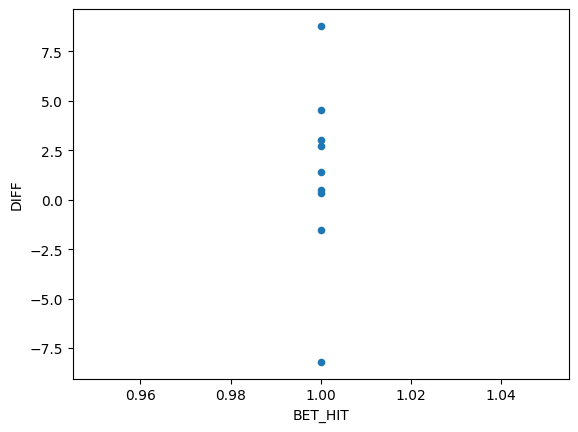

In [50]:
resid_df.plot.scatter(x = "BET_HIT", y = "DIFF")